In [1]:
# load modules

import matplotlib.pyplot as plt
import matplotlib
import argparse
import os,glob
from datetime import datetime

import numpy as np
import xarray as xr

# matplotlib.rc('xtick', labelsize=16)
# matplotlib.rc('xlabel', labelsize=16)
# matplotlib.rc('ytick', labelsize=16)
plt.rcParams.update({'font.size': 14})

currentdir = os.getcwd()

In [2]:
#%% Define directories

# current dir
wdir = os.getcwd()
# data dir
ddir = os.path.join(os.path.dirname(wdir),'output/linear_model')

In [3]:
#%% Load data

profiles = xr.open_dataset(os.path.join(ddir,'rad_profiles.nc'))

In [4]:
profiles

<xarray.Dataset>
Dimensions:      (launch_time: 199, play: 99, plev: 100)
Coordinates:
  * plev         (plev) float64 1e+03 2e+03 3e+03 ... 9.8e+04 9.9e+04 1e+05
  * play         (play) float64 1.5e+03 2.5e+03 3.5e+03 ... 9.85e+04 9.95e+04
  * launch_time  (launch_time) datetime64[ns] 2020-02-01 ... 2020-02-01
Data variables:
    platform     (launch_time) object ...
    tlay         (launch_time, play) float64 ...
    h2o          (launch_time, play) float64 ...
    zlay         (launch_time, play) float64 ...
    zlev         (launch_time, plev) float64 ...
    sfc_emis     (launch_time) float64 ...
    sfc_alb      (launch_time) float64 ...
    sfc_t        (launch_time) float64 ...
    cos_sza      (launch_time) float64 ...
    lw_dn        (launch_time, plev) float64 ...
    lw_up        (launch_time, plev) float64 ...
    lw_net       (launch_time, plev) float64 ...
    sw_dn        (launch_time, plev) float64 ...
    sw_up        (launch_time, plev) float64 ...
    sw_net       (launch_time, plev) float64 ...
    co2          (launch_time, play) float64 ...
    ch4          (launch_time, play) float64 ...
    n2o          (launch_time, play) float64 ...
    o3           (launch_time, play) float64 ...
    o2           (launch_time, play) float64 ...
    n2           (launch_time, play) float64 ...
    co           (launch_time, play) float64 ...
    mr           (launch_time, play) float64 ...
    rho          (launch_time, play) float64 ...
    q_rad        (launch_time, play) float64 ...
    q_rad_lw     (launch_time, play) float64 ...
    q_rad_sw     (launch_time, play) float64 ...

In [5]:
# perturbations
dT = 1 # K
dq = 0.001 # kg/kg

# number of levels
Np = profiles.play.size
# range of perturbed T
s_dT = slice(1,1+Np)
# range of perturbed q
s_dq = slice(1+Np,1+2*Np)

# Jacobian matrix dQrad/dX for X = T and q:
J_T_qrad = (profiles.q_rad[s_dT].T - np.repeat(profiles.q_rad[0].values[...,np.newaxis],Np,axis=-1))/dT
J_T_qrad = np.flipud(J_T_qrad)
J_q_qrad = (profiles.q_rad[s_dq].T - np.repeat(profiles.q_rad[0].values[...,np.newaxis],Np,axis=-1))/dq
J_q_qrad = np.flipud(J_q_qrad)

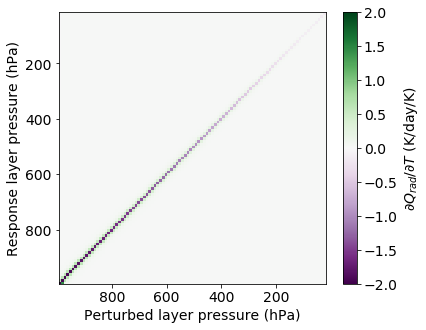

In [6]:
cmap_qrad = plt.cm.PRGn

J = J_T_qrad

X,Y = np.meshgrid(np.flipud(profiles.play)/100,np.flipud(profiles.play)/100)
# X,Y = np.meshgrid(profiles.play/100,profiles.play/100)
# vmax = max(np.max(J),np.max(-J))
vmax = 2
vmin = -vmax

fig,ax = plt.subplots(ncols=1,figsize=(6,5))

h = ax.pcolormesh(X,Y,J,cmap=cmap_qrad,vmin=vmin,vmax=vmax)
ax.invert_xaxis()
ax.invert_yaxis()

ax.set_xlabel('Perturbed layer pressure (hPa)')
ax.set_ylabel('Response layer pressure (hPa)')

plt.colorbar(h,label=r'$\partial Q_{rad}/\partial T$ (K/day/K)')

plt.savefig(os.path.join(currentdir,'../figures/kernel_T.pdf'),bbox_inches='tight')
plt.show()

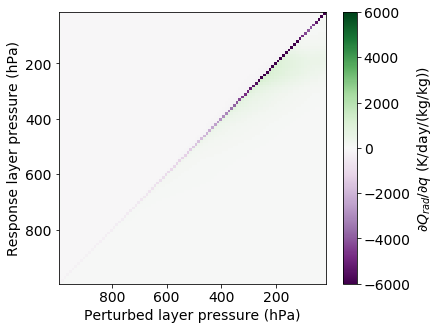

In [7]:
cmap_qrad = plt.cm.PRGn

J = J_q_qrad

X,Y = np.meshgrid(np.flipud(profiles.play)/100,np.flipud(profiles.play)/100)
# X,Y = np.meshgrid(profiles.play/100,profiles.play/100)
# vmax = max(np.max(J),np.max(-J))
vmax = 6000
vmin = -vmax

fig,ax = plt.subplots(ncols=1,figsize=(6,5))

h = ax.pcolormesh(X,Y,J,cmap=cmap_qrad,vmin=vmin,vmax=vmax)
ax.invert_xaxis()
ax.invert_yaxis()

ax.set_xlabel('Perturbed layer pressure (hPa)')
ax.set_ylabel('Response layer pressure (hPa)')

plt.colorbar(h,label=r'$\partial Q_{rad}/\partial q $ (K/day/(kg/kg))')

plt.savefig(os.path.join(currentdir,'../figures/kernel_q.pdf'),bbox_inches='tight')
plt.show()

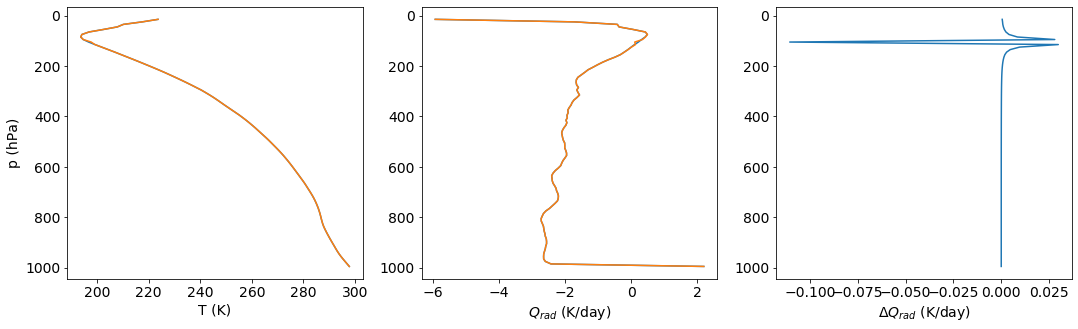

In [8]:
# i = 1
i = 90

fig,axs = plt.subplots(ncols=3,figsize = (18,5))

axs[0].plot(profiles.tlay[0],profiles.play/100)
axs[0].plot(profiles.tlay[i],profiles.play/100)
axs[0].invert_yaxis()
axs[0].set_ylabel('p (hPa)')
axs[0].set_xlabel('T (K)')

axs[1].plot(profiles.q_rad[0],profiles.play/100)
axs[1].plot(profiles.q_rad[i],profiles.play/100)
axs[1].invert_yaxis()
axs[1].set_xlabel(r'$Q_{rad}$ (K/day)')

axs[2].plot(profiles.q_rad[i]-profiles.q_rad[0],profiles.play/100)
axs[2].invert_yaxis()
axs[2].set_xlabel(r'$\Delta Q_{rad}$ (K/day)')

plt.savefig(os.path.join(currentdir,'../figures/perturbed_profile_and_response_T_lev%d.pdf'%i),bbox_inches='tight')
plt.show()

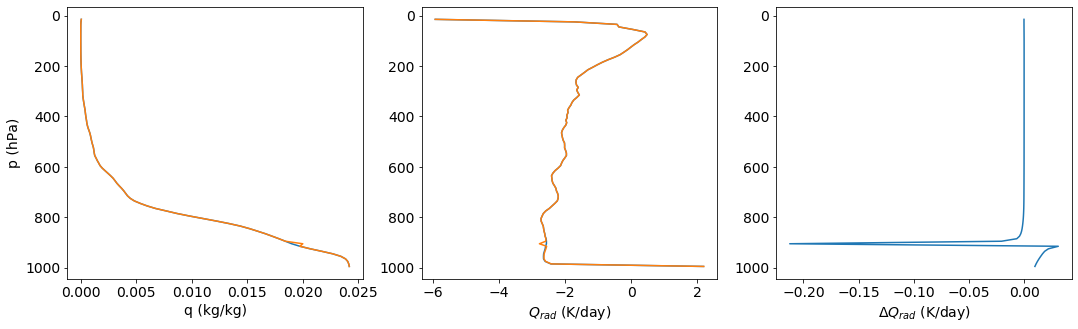

In [9]:
# i = 1
i = Np+10

fig,axs = plt.subplots(ncols=3,figsize = (18,5))

axs[0].plot(profiles.h2o[0],profiles.play/100)
axs[0].plot(profiles.h2o[i],profiles.play/100)
axs[0].invert_yaxis()
axs[0].set_ylabel('p (hPa)')
axs[0].set_xlabel('q (kg/kg)')

axs[1].plot(profiles.q_rad[0],profiles.play/100)
axs[1].plot(profiles.q_rad[i],profiles.play/100)
axs[1].invert_yaxis()
axs[1].set_xlabel(r'$Q_{rad}$ (K/day)')

axs[2].plot(profiles.q_rad[i]-profiles.q_rad[0],profiles.play/100)
axs[2].invert_yaxis()
axs[2].set_xlabel(r'$\Delta Q_{rad}$ (K/day)')

plt.savefig(os.path.join(currentdir,'../figures/perturbed_profile_and_response_q_lev%d.pdf'%(i-Np)),bbox_inches='tight')
plt.show()

# Reconstructing single profiles from kernel matrices

## Interpolate profiles on new pressure grid

In [10]:
print("load radiative profiles")

all_rad_profiles = xr.open_dataset('../output/rad_profiles_all_sondes.nc')

load radiative profiles


In [11]:
all_rad_profiles

<xarray.Dataset>
Dimensions:      (launch_time: 2093, zlay: 1000, zlev: 1001)
Coordinates:
    col          int32 ...
    lay          int32 ...
  * zlay         (zlay) int64 5 15 25 35 45 55 ... 9945 9955 9965 9975 9985 9995
  * zlev         (zlev) int64 0 10 20 30 40 50 ... 9960 9970 9980 9990 10000
  * launch_time  (launch_time) datetime64[ns] 2020-01-19T16:55:14 ... 2020-02-16T04:14:33
    play         (launch_time, zlay) float64 ...
    plev         (launch_time, zlev) float64 ...
Data variables:
    platform     (launch_time) object ...
    tlay         (launch_time, zlay) float64 ...
    h2o          (launch_time, zlay) float64 ...
    sfc_emis     (launch_time) float64 ...
    sfc_alb      (launch_time) float64 ...
    sfc_t        (launch_time) float64 ...
    cos_sza      (launch_time) float64 ...
    lw_dn        (launch_time, zlev) float64 ...
    lw_up        (launch_time, zlev) float64 ...
    lw_net       (launch_time, zlev) float64 ...
    sw_dn        (launch_time, zlev) float64 ...
    sw_up        (launch_time, zlev) float64 ...
    sw_net       (launch_time, zlev) float64 ...
    co2          (launch_time, zlay) float64 ...
    ch4          (launch_time, zlay) float64 ...
    n2o          (launch_time, zlay) float64 ...
    o3           (launch_time, zlay) float64 ...
    o2           (launch_time, zlay) float64 ...
    n2           (launch_time, zlay) float64 ...
    co           (launch_time, zlay) float64 ...
    mr           (launch_time, zlay) float64 ...
    rho          (launch_time, zlay) float64 ...
    q_rad        (launch_time, zlay) float64 ...
    q_rad_lw     (launch_time, zlay) float64 ...
    q_rad_sw     (launch_time, zlay) float64 ...

In [12]:
print("interpolate T, q, and qrad onto the matrix' pressure grid")

number_sondes = len(all_rad_profiles.launch_time)

all_profiles_interp = []

for i in range(number_sondes):
# for i in range(100,101):

    alt_var = "zlay"
    p_var = 'play'
    q_var = 'h2o'
    t_var = 'tlay'
#     rh_var = 'relative_humidity'

    sonde = all_rad_profiles.isel(launch_time = i).dropna(dim=alt_var,\
                           subset=[alt_var,p_var,q_var,t_var],\
                                               how="any")

    if (sonde[alt_var].values.size < 10 or sonde[alt_var].min() > 200):
        print("The sonde is empty ")
        sonde.close()            

    else:

        #We get rid of z=0 due to interface issue
      #  sonde = sonde.where(sonde.gpsalt > 0, drop = True)

        sonde = sonde.swap_dims({alt_var:p_var}).reset_coords()
        sonde = sonde.swap_dims({'zlev':'plev'}).reset_coords()
        
        # interpolate on play and plev from matrix
        q_interp = sonde[q_var].interp(play=profiles.play)
        t_interp = sonde[t_var].interp(play=profiles.play)
        qrad_interp = sonde['q_rad'].interp(play=profiles.play)
        
        # create new dataset
        profile = xr.Dataset({"launch_time":([], sonde.launch_time),\
                                  "tlay"   :(["play"], t_interp), \
                                  "play"   :(["play"], profiles.play), \
                                  "h2o":(["play"], q_interp),  \
                                  "q_rad":(['play'],qrad_interp)})

        # store
        all_profiles_interp.append(profile)

all_rad_profiles_interp = xr.concat(all_profiles_interp,dim="launch_time")

interpolate T, q, and qrad onto the matrix' pressure grid
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 
The sonde is empty 


In [13]:
all_rad_profiles_interp

<xarray.Dataset>
Dimensions:      (launch_time: 2074, play: 99)
Coordinates:
  * play         (play) float64 1.5e+03 2.5e+03 3.5e+03 ... 9.85e+04 9.95e+04
  * launch_time  (launch_time) datetime64[ns] 2020-01-19T16:55:14 ... 2020-02-16T04:14:33
Data variables:
    tlay         (launch_time, play) float64 nan nan nan ... 296.3 297.2 298.0
    h2o          (launch_time, play) float64 nan nan nan ... 0.02391 0.02432
    q_rad        (launch_time, play) float64 nan nan nan ... -2.724 -3.03 -2.885

## Test on a few example profiles

Text(0.5, 0, '$Q_{rad}$ (K/day)')

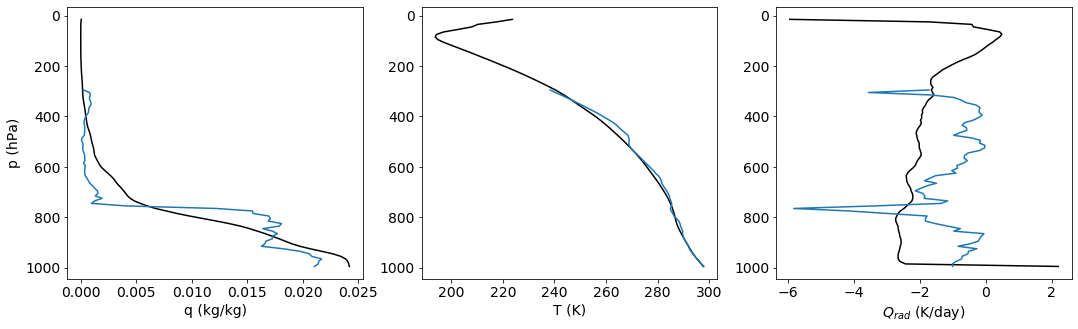

In [21]:
i_lt = 50
sonde = all_rad_profiles_interp.isel(launch_time=i_lt)

fig,axs = plt.subplots(ncols=3,figsize=(18,5))

ax = axs[0]
varid = 'h2o'
ax.plot(profiles[varid][0],profiles.play/100,'k')
ax.plot(sonde[varid],sonde.play/100)
ax.invert_yaxis()
ax.set_xlabel('q (kg/kg)')
ax.set_ylabel('p (hPa)')

ax = axs[1]
varid = 'tlay'
ax.plot(profiles[varid][0],profiles.play/100,'k')
ax.plot(sonde[varid],sonde.play/100)
ax.invert_yaxis()
ax.set_xlabel('T (K)')

ax = axs[2]
varid = 'q_rad'
ax.plot(profiles[varid][0],profiles.play/100,'k')
ax.plot(sonde[varid],sonde.play/100)
ax.invert_yaxis()
ax.set_xlabel(r'$Q_{rad}$ (K/day)')

plt.savefig(os.path.join(currentdir,'../figures/example_profile_%d.pdf'%i_lt),bbox_inches='tight')
plt.show()

In [23]:
dq = sonde.h2o-profiles.h2o[0]
dq[np.isnan(dq)] = 0

dQ_from_dq = J_q_qrad
print(dq)

<xarray.DataArray 'h2o' (play: 99)>
array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.56800109e-05,  6.13072339e-04,  6.90293326e-04,  5.74491928e-04,
        5.75823435e-04,  6.58196537e-04,  5.92575470e-04,  3.97991897e-04,
        3.24294864e-04,  2.71575972e-04,  5.97393614e-05, -8.28734476e-05,
       -1.91520917e-04, -2.47212702e-04, -2.38358367e-04, -3.01241417e-04,
       -3.83795956e-04, -4.64015388e-04, -5.55744688e-04, -8.00630628e-04,
       -9.01395797e-04, -8.41127755e-04, -8.76803888e-04, -9.674

# Variance decomposition